In [1]:
%load_ext autoreload
# %load_ext fireducks.pandas # linux only for now

In [2]:
from kret_studies import *
from kret_studies.notebook_imports import *

In [3]:
data_url = r"https://users.stat.ufl.edu/%7Errandles/sta4210/Rclassnotes/data/textdatasets/KutnerData/Chapter%20%201%20Data%20Sets/CH01PR19.txt"
url = data_url

In [ ]:
df_scores_gpa = pd.read_csv(url, sep=r"\s+", header=None, names=["GPA", "ACT"])
df = df_scores_gpa
df.shape

(120, 2)

In [5]:
df.sample(3)

,GPA,ACT
39,3.646,26
95,3.833,24
110,3.419,22


## Question 1

### (a) Prepare a boxplot of ACT Scores

In [6]:
fig, ax = uks_mpl.subplots(2)

In [7]:
sns.boxplot(x=df.ACT, ax=ax[0])
sns.boxplot(x=df.GPA, ax=ax[1])

<Axes: xlabel='GPA'>

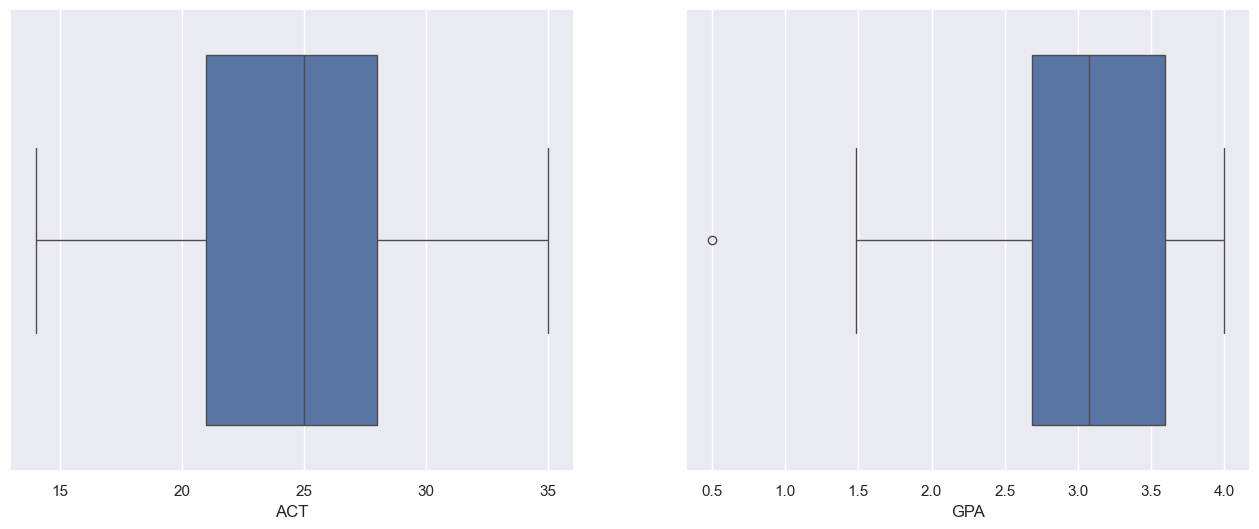

In [8]:
fig

I don't see anything particularly noteworth about the distribution of ACT scores

### (b) Plot the studentized residuals against the fitted values Y hat

In [9]:
model = smf.ols("GPA ~ ACT", data=df).fit()

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     9.240
Date:                Thu, 12 Jun 2025   Prob (F-statistic):            0.00292
Time:                        16:37:22   Log-Likelihood:                -112.50
No. Observations:                 120   AIC:                             229.0
Df Residuals:                     118   BIC:                             234.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1140      0.321      6.588      0.000       1.479       2.750
ACT            0.0388      0.013      3.040      0.003       0.014       0.064
==============================================================================
Omnibus:                       26.969   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.360
Skew:                          -0.994   Prob(JB):                     5.20e-11
Kurtosis:                       5.349   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
studentized_residuals: np.ndarray = model.get_influence().resid_studentized_external

In [12]:
fig, ax = uks_mpl.subplots(1)

In [13]:
sns.scatterplot(x=model.fittedvalues, y=studentized_residuals, ax=ax)
ax.axhline(y=0, color="r", linestyle="--", linewidth=0.8)

ax.axhline(y=2, color="gray", linestyle=":", linewidth=0.6)
ax.axhline(y=-2, color="gray", linestyle=":", linewidth=0.6)
ax.axhline(y=3, color="orange", linestyle=":", linewidth=0.6)
ax.axhline(y=-3, color="orange", linestyle=":", linewidth=0.6)
ax.set_title("Studentized Residuals vs. Fitted Values")
ax.set_xlabel(r"Fitted Values ($\hat{Y}$)")
ax.set_ylabel("Studentized Residuals")
ax.grid(True, linestyle="--", alpha=0.6)

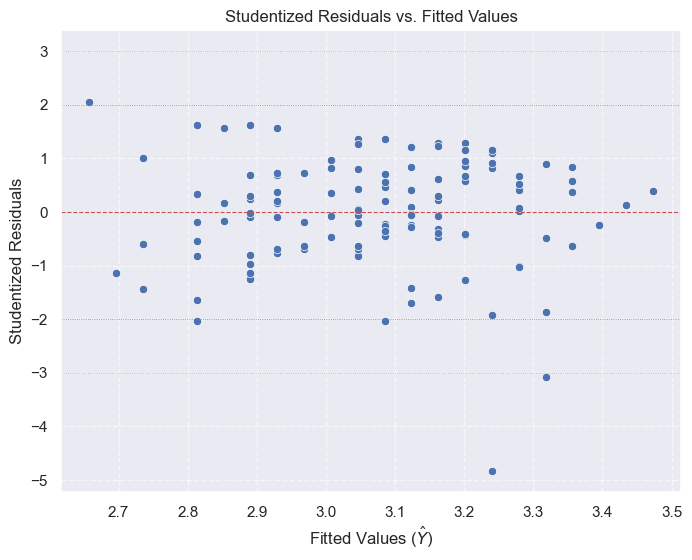

In [14]:
fig

Perhaps you could make the claim that there is some slight heteroskedacity (unequal variance throughout the range). You could firmly make the claim that there are a lot of data points outside of
abs(3) bounds, which is abnormal for a dataset of size 120.

### (c) How many studentized residuals are outside 1 stdev? How many would you expect to see?

In [15]:
display("Observed:")
(abs(studentized_residuals) > 1).sum()

'Observed:'

np.int64(34)

In [16]:
display("Expected")
len(df) * 0.32

'Expected'

38.4

### (d) Prepare a normal probability plot of the residuals. Test the reasonableness of the normality assumption with the KS test using alpha = 0.05. What do you conclude?

In [17]:
fig, ax = uks_mpl.subplots()
_ = stats.probplot(model.resid, dist="norm", plot=ax)
ax.set_title("Normal Probability Plot of Residuals")
ax.set_xlabel("Theoretical Quantiles (Standard Normal)")
ax.set_ylabel("Ordered Residuals")
ax.grid(True, linestyle="--", alpha=0.6)

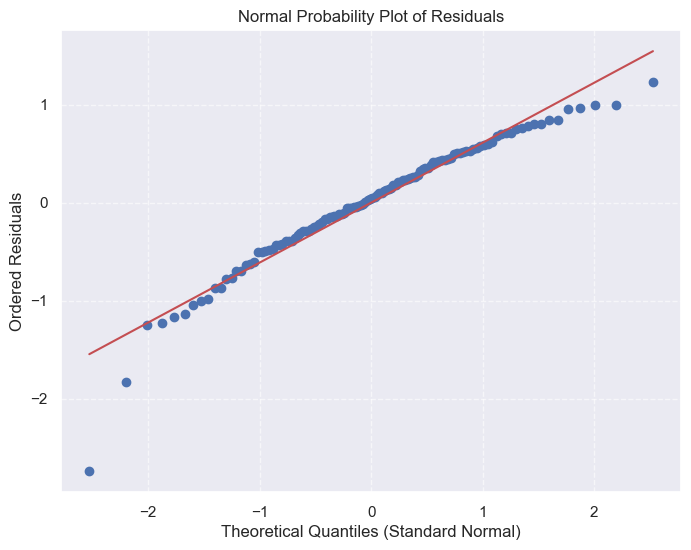

In [18]:
fig

In [19]:
alpha = 0.05
resid_mean = np.mean(model.resid)
resid_std = np.std(model.resid)
ks_statistic, p_value = stats.kstest(model.resid, "norm", args=(resid_mean, resid_std))

In [20]:
display(f"{p_value=}")
p_value > alpha

'p_value=np.float64(0.8039062437680743)'

np.True_

Fail to reject null hypothesis

### (e) Conduct the BP test to determine if the variance varies with the level of X

In [21]:
from statsmodels.stats.api import het_breuschpagan  # For the BP test

In [22]:
alpha = 0.01

In [23]:
lm_statistic, lm_p_value, f_statistic, f_p_value = het_breuschpagan(model.resid, model.model.exog)

In [24]:
lm_statistic, lm_p_value, f_statistic, f_p_value

(np.float64(0.2939703351316725),
 np.float64(0.587687408121988),
 np.float64(0.28978072067591587),
 np.float64(0.5913750635004957))

We fail to reject the null hypothesis, as both p-values are pretty high

## Question 2

In [25]:
df2 = pd.read_csv("HW2.csv").rename(columns={"Unnamed: 0": "index"})

In [26]:
df2.head(3)

,index,x,y
0,1,0.181027,5.375997
1,2,0.848139,13.706605
2,3,2.706810,12.453427


In [27]:
## For the sake of switching it up, I'll compute this linear
## regression using sklearn instead of statsmodels

### (a) Prepare a scatterplot of X vs Y overlaid with the estimated regression line

In [28]:
lin_reg = LinearRegression()
X = df2[["x"]]

In [29]:
lin_reg.fit(X, df2.y)

LinearRegression()

In [30]:
y_hat = lin_reg.predict(X)

In [31]:
# Again for the sake of switching it up, lets plot using matplotlib built-in functions instead
# of using seaborn and passing a matplotlib ax object

In [32]:
fig, ax = uks_mpl.subplots()
ax.scatter(df2.x, df2.y, alpha=0.3)
ax.plot(df2.x, y_hat, color="orange")

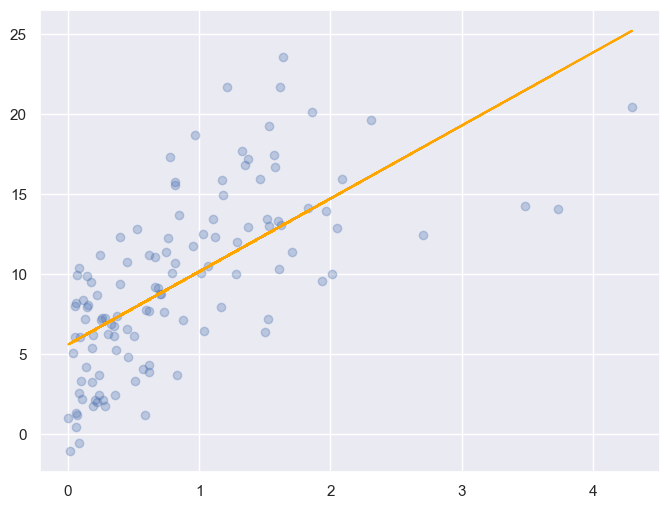

In [33]:
fig

### (b) Calculate the correlation coefficient between X and Y and comment on the strength of the linear relation

In [34]:
df2.x.corr(df2.y)

np.float64(0.6642196565593228)

According to the 0.7 cutoff, this is only moderate linear correlation

### (c) sqrt of x

In [35]:
df2["sqrt_x"] = np.sqrt(df2.x)

In [36]:
df2.head(2)

,index,x,y,sqrt_x
0,1,0.181027,5.375997,0.425473
1,2,0.848139,13.706605,0.920944


### (d) Compare this sqrt fit on y

In [37]:
## We'll copy the same steps from above

In [38]:
lin_reg = LinearRegression()
X = df2[["sqrt_x"]]

In [39]:
lin_reg.fit(X, df2.y)

LinearRegression()

In [40]:
y_hat = lin_reg.predict(X)

In [41]:
fig, ax = uks_mpl.subplots()
ax.scatter(df2.sqrt_x, df2.y, alpha=0.3)
ax.plot(df2.sqrt_x, y_hat, color="orange")

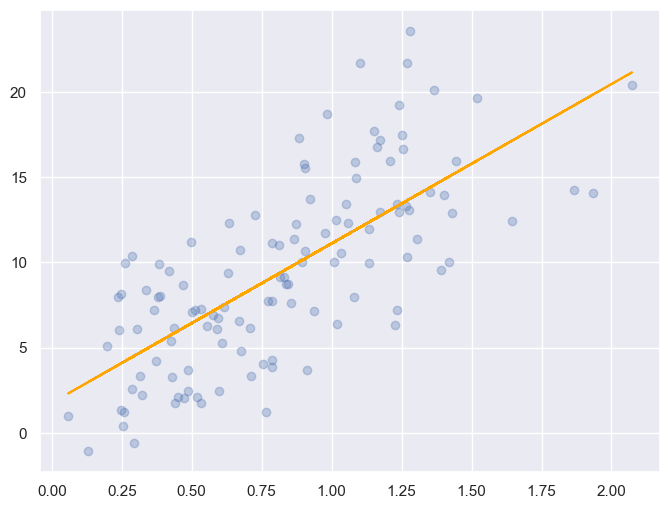

In [42]:
fig

### (e) Recalculate pearson coefficient

In [43]:
df2.sqrt_x.corr(df2.y)

np.float64(0.717123732374986)

Hey! Conveniently this is now strongly correlated

### (f) Fit a linear regression function for the transformed data and plot the residuals vs fitted values

We will repeat our steps from 1(b) to get the residuals vs fitted values

In [44]:
model = smf.ols("y ~ sqrt_x", data=df2).fit()

In [45]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     124.9
Date:                Thu, 12 Jun 2025   Prob (F-statistic):           3.19e-20
Time:                        16:37:23   Log-Likelihood:                -328.99
No. Observations:                 120   AIC:                             662.0
Df Residuals:                     118   BIC:                             667.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7636      0.769      2.293      0.024       0.240       3.287
sqrt_x         9.3497      0.836     11.177      0.000       7.693      11.006
==============================================================================
Omnibus:                        2.883   Durbin-Watson:                   1.684
Prob(Omnibus):                  0.237   Jarque-Bera (JB):                2.719
Skew:                           0.297   Prob(JB):                        0.257
Kurtosis:                       2.563   Cond. No.                         4.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
studentized_residuals: np.ndarray = model.get_influence().resid_studentized_external

In [47]:
fig, ax = uks_mpl.subplots(1)

In [48]:
sns.scatterplot(x=model.fittedvalues, y=studentized_residuals, ax=ax)
ax.axhline(y=0, color="r", linestyle="--", linewidth=0.8)

ax.axhline(y=2, color="gray", linestyle=":", linewidth=0.6)
ax.axhline(y=-2, color="gray", linestyle=":", linewidth=0.6)
ax.axhline(y=3, color="orange", linestyle=":", linewidth=0.6)
ax.axhline(y=-3, color="orange", linestyle=":", linewidth=0.6)
ax.set_title("Studentized Residuals vs. Fitted Values")
ax.set_xlabel(r"Fitted Values ($\hat{Y}$)")
ax.set_ylabel("Studentized Residuals")
ax.grid(True, linestyle="--", alpha=0.6)

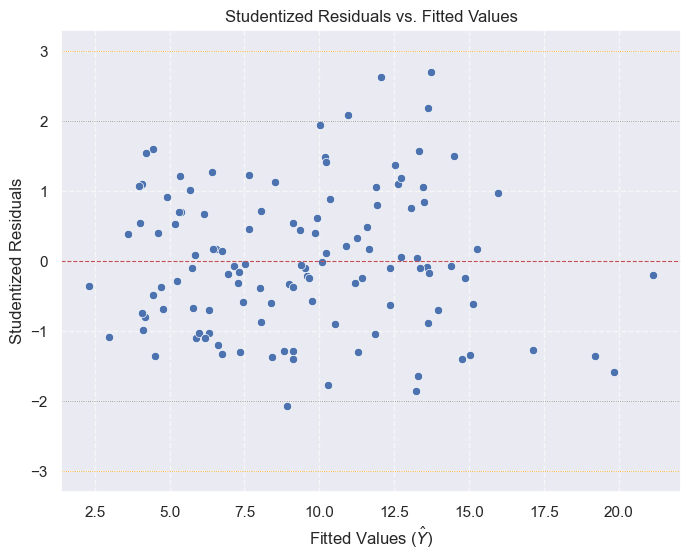

In [49]:
fig

### (h) what does (f) show?

In [50]:
df2.shape

(120, 4)

Overall, I don't see too obvious of patterns in the residuals, excessive heteroskedasticity, or a general trend. In addition, seeing 5 points outside of the +/-2 bounds is less than expected (120 * 0.05 = 6)

## Question 3

In [51]:
df3 = pd.DataFrame({"temperature": [8, 4, 0, -4, -8], "weeks": [7.8, 9, 10.2, 11, 11.7]})

In [52]:
df3

,temperature,weeks
0,8,7.8
1,4,9.0
2,0,10.2
3,-4,11.0
4,-8,11.7


In [53]:
X = np.c_[np.ones(df3.shape[0]), df3["temperature"].values.reshape(-1, 1)]
Y = df3["weeks"].values.reshape(-1, 1)
n = len(Y)

(a) Y^T * Y

In [54]:
y_t_y = Y.T @ Y
y_t_y

array([[503.77]])

(b) X^T * X

In [55]:
x_t_x = X.T @ X
x_t_x

array([[  5.,   0.],
       [  0., 160.]])

(b) (X^T * X)-1

In [56]:
# NOTE this doesn't work ---> np.linalg.inv(x_t_x)
# this dot product is just a scalar
X_T_X_inv = np.linalg.inv(x_t_x)
X_T_X_inv

array([[0.2    , 0.     ],
       [0.     , 0.00625]])

(d) Vector b of estimated regression coefficients (b = (X'X)^-1 X'Y))

In [57]:
X_T_Y = X.T @ Y
b_vector = X_T_X_inv @ X_T_Y

In [58]:
Y_hat = X @ b_vector

### (e) vector of residuals

In [59]:
residuals = Y - Y_hat

In [60]:
np.sum(residuals)  # ok good, pretty much 0, so unbiased

np.float64(-7.993605777301127e-15)

### (f) SSR

In [61]:
Y_mean = np.mean(Y)

In [62]:
SSR = np.sum((Y_hat - Y_mean) ** 2)
SSR

np.float64(9.603999999999996)

### (g) SSE

In [63]:
SSE = residuals.T @ residuals
SSE

array([[0.148]])

### (h) Covariance b

In [64]:
n = len(Y)

In [65]:
p = X.shape[1]  # Number of columns in X (number of parameters)
MSE = SSE / (n - p)

In [66]:
Cov_b = MSE * X_T_X_inv
Cov_b

array([[0.00986667, 0.        ],
       [0.        , 0.00030833]])

### (i) point estimate 

In [67]:
X_h = np.array([1, -6]).reshape(1, -1)  # Reshape to a row vector (1, p)
point_estimate_Yh = X_h @ b_vector
point_estimate_Yh

array([[11.41]])

### (h) Hat Matrix

In [68]:
Hat_H = X @ X_T_X_inv @ X.T
Hat_H

array([[ 0.6,  0.4,  0.2,  0. , -0.2],
       [ 0.4,  0.3,  0.2,  0.1,  0. ],
       [ 0.2,  0.2,  0.2,  0.2,  0.2],
       [ 0. ,  0.1,  0.2,  0.3,  0.4],
       [-0.2,  0. ,  0.2,  0.4,  0.6]])